# $Analisi$ $della$ $distribuzione$ $di$ $miscentering$ $di$ $ammassi$ $eRosita$
$$
MatteoDiGirolamo
$$
### $Abstract$
<div style="">
<p>
    
$\text{In questo lavoro analizziamo l’offset tra il centro X–ray, che traccia il gas caldo degli ammassi, e il centro }$
$\text{ottico, associato alla distribuzione delle galassie. In particolare ci focalizzeremo sullo studio di come }$
$\text{l'offset dipenda da massa e redshift degli ammassi e sulla valutazione ed il confronto di due modelli }$
$\text{della distribuzione dell'offset. Studiando il comportamento medio dell’offset in funzione della massa }$
$\text{e del redshift, troviamo che esso cresce nei sistemi a bassa massa, indicando un maggiore grado di irregolarità.}$
$\text{La dipendenza dal redshift risulta invece debole,suggerendo che l’epoca osservativa non influisce  }$
$\text{}$
$\text{significativamente sul disallineamento tra componenti collisive e collisionless. I risultati confermano  }$
$\text{che la massa rappresenta il principale fattore che determina il livello di miscentering negli ammassi }$
$\text{di galassie.}$
$\text{Analizzando i modelli S15 e Z19 per la distribuzione dell'offset, si è osservato che i parametri vengono }$
$\text{"fittati" con molta precisione. Tuttavia, svolgendo un test del CHIquadro abbiamo dedotto che il modello }$
$\text{Z19 descrive in modo decisamente migliore i dati osservati.}$
$\text{}$
</p>
</div>

# $Elaborato$ $d'esame$


## $Introduzione$
<div style="">
<p>
 
$\text{La survey eROSITA (extended ROentgen Survey with an Imaging Telescope Array)
rappresenta un'importante}$
$\text{missione astronomica finalizzata alla mappatura dell'intero cielo nell'alta energia dei raggi X.}$
$\text{La prima data release della survey eROSITA, pubblicata nel febbraio 2024, fornisce un catalogo dettagliato }$
$\text{degli ammassi di galassie, offrendo dati cruciali per lo studio della struttura su larga scala dell'universo }$
$\text{e dei meccanismi che guidano la sua evoluzione.}$

$\text{La calibrazione della miscentering distribution, ovvero la distribuzione degli offset tra i
centri }$
$\text{degli ammassi di galassie tracciati dalla componente collisionale (gas) e dalla
componente}$
$\text{non collisionale (galassie), è essenziale per migliorare l'accuratezza delle
misure}$
$\text{cosmologiche derivanti dagli studi degli ammassi di galassie. Questi offset
possono}$
$\text{influenzare significativamente la stima della massa degli ammassi, alterando le
inferenze}$
$\text{cosmologiche ottenute dalla loro distribuzione e evoluzione nel tempo.}$


</p>
</div>
  


## $Obiettivo$
<div style="">
<p>


$\text{Il fine dell'elaborato è quello di scrivere ed illustrare un programma in linguaggio python per analizzare }$
$\text{la miscenteringe distribution degli ammassi digalassie utilizzando i dati della prima data release di eROSITA.}$
$\text{Il focus sarà sullo studio della distribuzione dell'offset in relazione alla massa e al redshift degli }$
$\text{ammassi, e sulla valutazione di modelli predittivi basati sui parametri rho, sigma0 e sigma1.}$
$\text{}$

</p>
</div>
 


# $Spiegazione$ $ed$ $illustrazione$ $del$ $codice$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Per raggiunger il fine sopra menzionato è stato scritto un programma in linguaggio python.}$
$\text{Il codice verrà illustrato nel modo seguente: sopra ogni cella contenente un blocco di codice, sarà  presente}$
$\text{una breve spiegazione del suo ruolo e della struttura, per differenziare le discussioni dei risultati dalle}$
$\text{spiegazioni del codice, queste ultime verrano evidenziate nei box gialli. Inoltre all'interno del codice saranno }$
$\text{presenti ulteriori commenti.}$


</p>
</div>

### $Primo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Vengono importati i moduli necessari per la costruzione di tutto il programma. Successivamente viene}$
$\text{semplicemente letto il file catalog.csv, contenente i dati del primo release di eRosita. In seguito, vengono }$ 
$\text{salvate le colonne contenenti: le misure di redshift, della massa e dell'offset. I dati vengono salvati }$
$\text{come series panda.}$

</p>
</div>

In [1]:
#importo tutti i moduli utili per il codice seguente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Letura dei dati
file_path = "catalog.csv"
df = pd.read_csv(file_path)

#Selezino le colonne relative ai dati di interesse 
z = df["BEST_Z"]
logM = df["logM500"]
offset = df["BCG_offset_R500"]

### $Secondo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Questa parte del programma plotta gli istogrammi dei diversi valori d'interesse. Viene infatti impostata una }$
$\text{figura che mi consente di plottare i tre grafici uno affianco all'altro e poi uso la funzione .hist di }$ 
    $\text{matplotlib per creare gli istogrammi. }$
$\text{Vogliamo poi calcolare i valori di massimo e minimo, deviazione standard, medie e quartili.}$
$\text{Questo viene fatto sfruttando la funzione .describe di pandas, che restituisce una series. }$
    $\text{Per la presentazione grafica relativamente estetica viene usato del codice HTML. Tutto cio viene}$
    $\text{incluso direttamente in una funzione che poi può essere direttamente applicata alle series dei valori da}$
    $\text{analizzare. Dopo aver creato le tabelle, sempre con codice HTML, queste vengono affiancate }$
    $\text{semplicemente per motivi estetici.}$

</p>
</div>

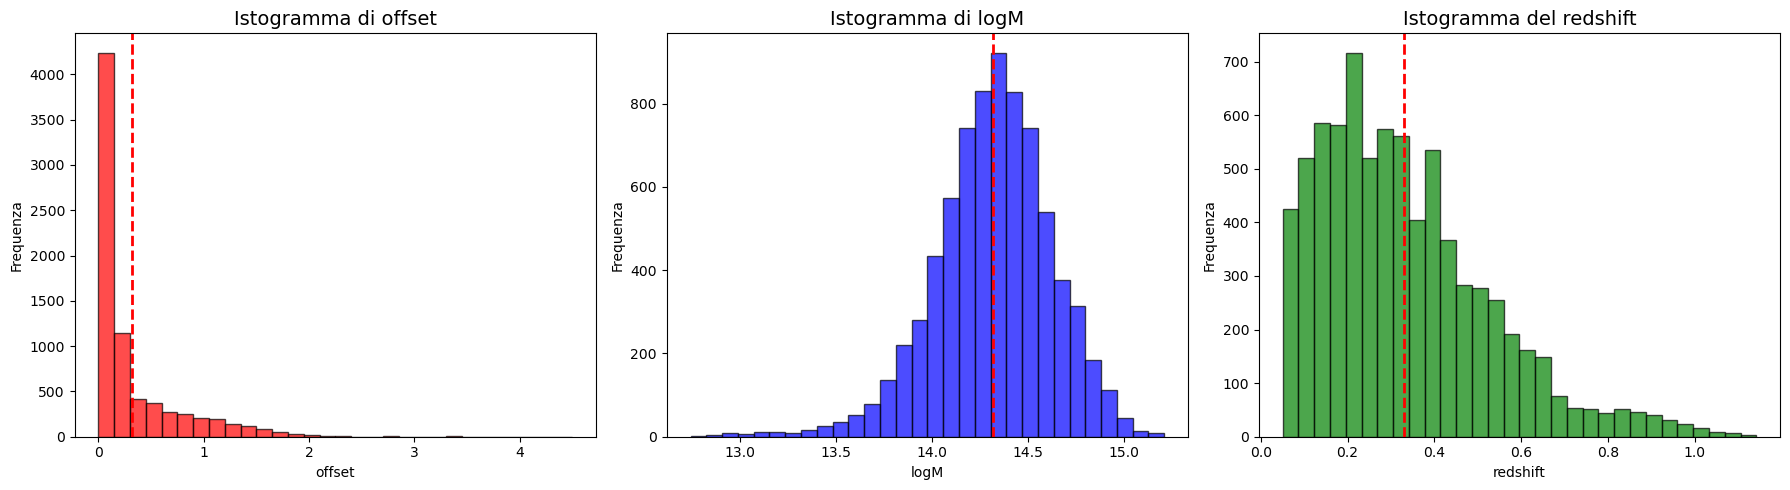

,Statistiche
count,7567.000
mean,0.317
std,0.440
min,0.001
25%,0.048
50%,0.121
75%,0.399
max,4.498
,Statistiche
count,7567.000


In [2]:
#voglio valutare la distribuzione di ogni valore
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #per plottare le tre distribuzioni una affianco all'altra

# Istogramma dell'offset 
axes[0].hist(offset, bins=30, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title("Istogramma di offset", fontsize=14)
axes[0].set_xlabel("offset")
axes[0].set_ylabel("Frequenza")
axes[0].axvline(x=0.317, color='red', linestyle='--', linewidth=2)

# Istogramma di logM 
axes[1].hist(logM, bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Istogramma di logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("Frequenza")
axes[1].axvline(x=14.315, color='red', linestyle='--', linewidth=2)


# Istogramma di redshift
axes[2].hist(z, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title("Istogramma del redshift", fontsize=14)
axes[2].set_xlabel("redshift")
axes[2].set_ylabel("Frequenza")
axes[2].axvline(x=0.331, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

from IPython.display import HTML # importo il modulo solamente per una presentazione grafica migliore

def make_styled_table(series, title): #definisco funzione che usa la funzione .describe per calcolare 
                                      #valori statistici come var. mean, quartili ecc. 
                                      #e poi restituisce una tabella HTML stilizzata contenente tali valori
    
    return (
        series.describe().to_frame("Statistiche")
        .style.format("{:.3f}")
        .set_caption(title)
        .set_table_styles([
            {"selector": "caption",
             "props": "font-size:16px; font-weight:bold; text-align:left; padding:8px;"},

            {"selector": "th",
             "props": "background:#323232; color:white; padding:8px;"},

            {"selector": "td",
             "props": "padding:8px; border-bottom:1px solid #DDD;"},
        ])
        .to_html()
    )


# Creazione delle tabelle
table_offset = make_styled_table(offset, "Statistiche di offset")
table_logM   = make_styled_table(logM,   "Statistiche di logM")
table_z      = make_styled_table(z,      "Statistiche di redshift")

# HTML per metterle affiancate
html = f"""
<div style="display:flex; gap:100px;">

    <div style="flex:1;">
        {table_offset}
    </div>

    <div style="flex:1;">
        {table_logM}
    </div>

    <div style="flex:1;">
        {table_z}
    </div>

</div>
"""

HTML(html)

### $Distribuzione$ $dei$ $dati$

<div style="">
<p>
$\text{Gli istogrammi presentati hanno il fine di fornirci solamente un ideaa qualitativa di come sono distribuiti}$
$\text{i campioni. Osserviamo che i valori di offset sono molto concentrati "vicino" lo zero, infatti il 75%}$ %
$\text{del campione ha un offset misurato minore di 0,399}$

$\text{}$
</p>
</div>

### $Terzo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
    
$\text{L'obiettivo di questa parte è plottare gli scatter per mostrare la distribuzione dell'offset in funzione}$
$\text{di LogM e redshift. Utilizzando quindi del codice analogo al blocco precedente e sostituendo .hist con .scatter,}$
$\text{ vado plottare tre grafici:                                                                                   }$
    
$\text{-Il primo mostra l'offset in funzione sia di logM che del redshift, dove la  
      "dimensione"dell'offset viene}$
$\text{espressa dalla scala di colori "turbo"                                                                         }$
    
$\text{-Il secondo mostra i punti offset vs logM                                                              }$

$\text{-Il terzo mostra i punti offset vs redshift}$

$\text{Poi, per poter vedere meglio i punti con offset relativamente alto, vengono eseguiti gli stessi plot ma}$
$\text{solo per punti con offset > 1.64. Per filtrare i campioni viene definita una mask. Sfruttando una funzionalità}$
$\text{del modulo pandas posso creare una series contenente solo due elementi: true o false. }$
$\text{La mask viene creata ponenedo un criterio come apunto: mask=offset>=1.64  }$
$\text{Con questo criterio viene quindi creata una series con la stessa shape di offset ma con elemento true}$
$\text{se in quella posizione il valore di offset soddisfa il criterio o, in caso contrario, false. Una volta }$
$\text{ottenuta la mask posso usare offset[mask] per creare una nuova serie con i valori "filtrati" in base al }$
$\text{mio criterio.}$
$\text{}$
$\text{}$
$\text{}$

</div>

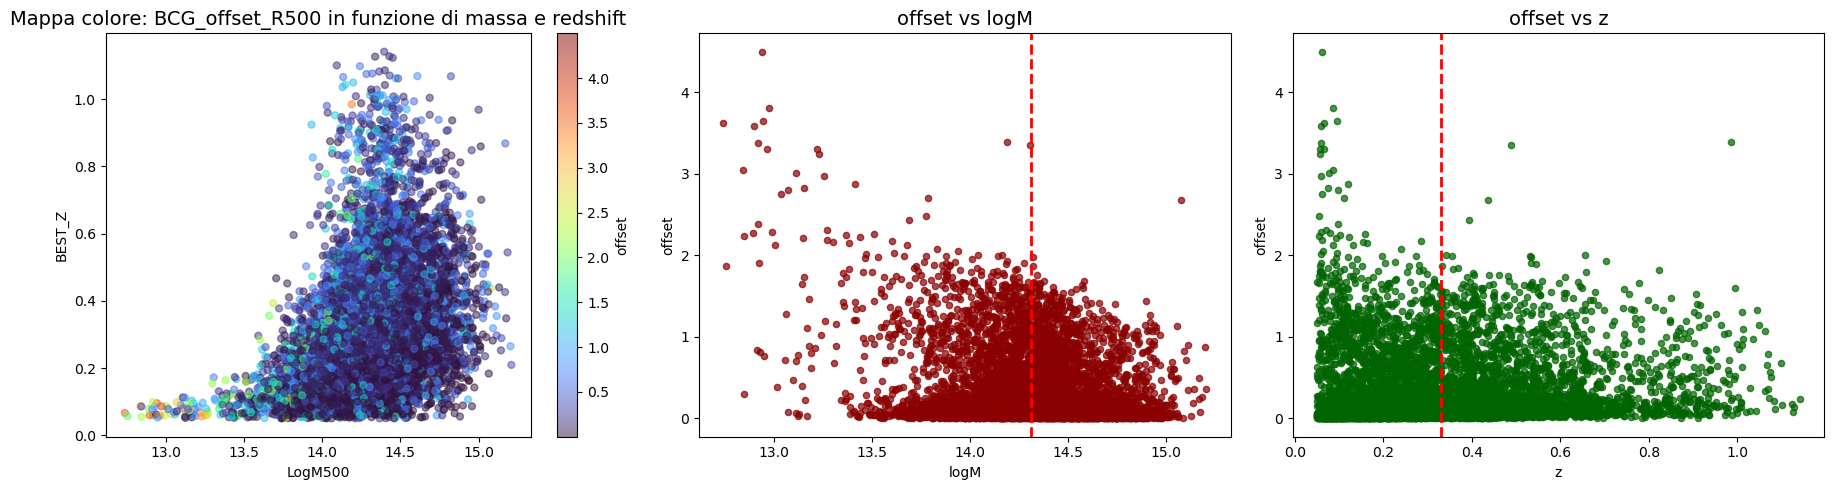

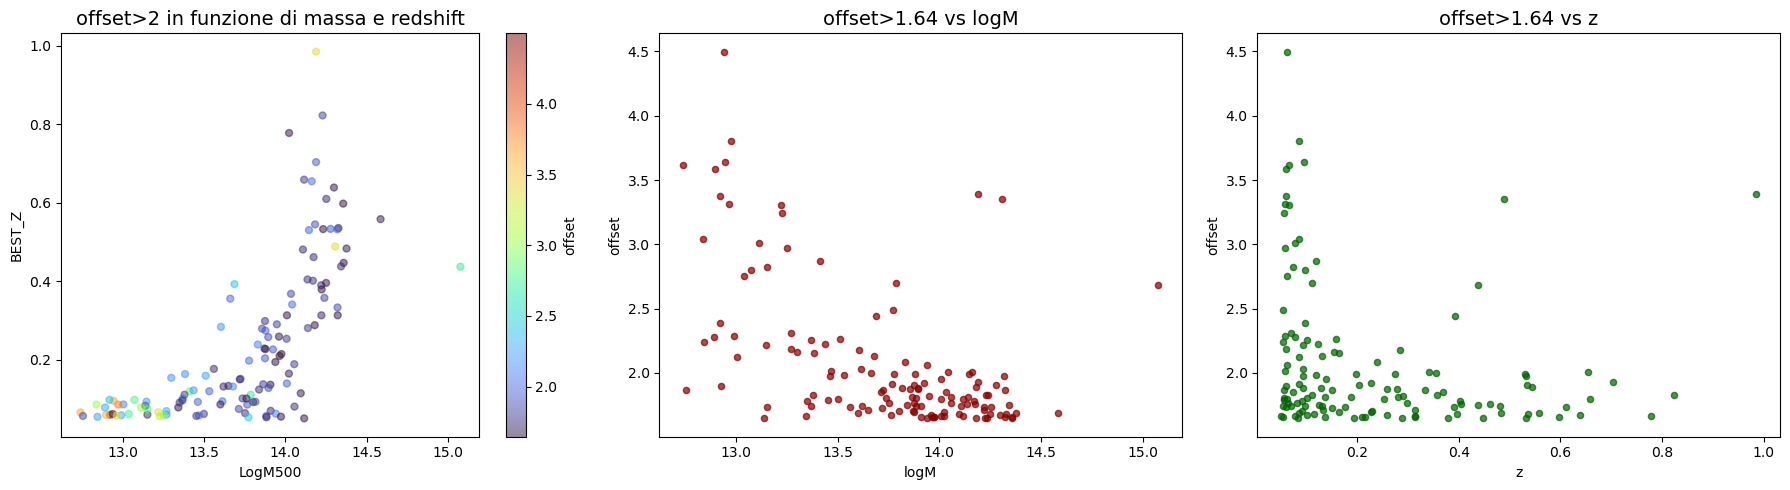

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # sempre per ottenere i plot affiancati

#ora faccio lo scatter plot per valutare la distribuzione dell'offset in funzione di logM e z
# offset vs massa e redshift
sc = axes[0].scatter(logM, z,c=offset,cmap="turbo",s=25,alpha=0.5)
axes[0].set_title("Mappa colore: BCG_offset_R500 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")


# Scatter plot dell'offset vs logM 
axes[1].scatter(logM, offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")
axes[1].axvline(x=14.315, color='red', linestyle='--', linewidth=2)

# Scatter plot dell'offset vs z 
axes[2].scatter(z, offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")
axes[2].axvline(x=0.331, color='red', linestyle='--', linewidth=2)


plt.tight_layout()
plt.show()

mask = offset >= 1.640 # definisco una mask per filtrare i punti con offset "alto"
new_offset = offset[mask]
new_logM   = logM[mask]
new_z      = z[mask]

#eseguo i plot dei dati "filtrati"
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Scatter plot dell'offset vs LogM e z
sc = axes[0].scatter(new_logM, new_z,c=new_offset,cmap="turbo",s=25,alpha=0.5)

axes[0].set_title("offset>2 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")

# aggiungi la colorbar
cbar = plt.colorbar(sc, ax=axes[0])
cbar.set_label("offset")

# Scatter plot dell'offset vs logM 
axes[1].scatter(new_logM, new_offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset>1.64 vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")

# Scatter plot dell'offset vs z 
axes[2].scatter(new_z, new_offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset>1.64 vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")


plt.tight_layout()
plt.show()


### $Distribuzione$ $dell'offset$ $in$ $relazione$ $a$ $logM$ $e$ $redshift$

<div style="">
<p>
    
$\text{Nella prima fila di grafici, troviamo, in ordine da sinistra verso destra:                          }$

$\text{-Plot dell'offset in funzione di LogM e del redshift, dove il valore dell'offset viene rappresentato dalla}$
$\text{scala di colori}$

$\text{-Plot dell'offset in funzione di logM}$

$\text{-Plot dell'offset in funzione del redshift.}$

$\text{La seconda fila mostra invece gli stessi grafici ma solo per i punti con offset > di ??.}$

$\text{Si osserva, che i campioni con offset vicino al massimo osservato, sembrano avere valori di logM e redshift }$
$\text{relativamente piccoli.}$ 



</p>
</div>

### $Plot$ $dell'andamento$ $medio$ $dell'offset$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>


$\text{Il seguente blocco serve per plottare l'andamento medio dell'offset. Per farlo, vine prima definito il numero }$
$\text{di bin nell'intervallo di distribuzione di logM e del redshift. Poi viene definita una funzione. }$
$\text{ Essa prende come argomenti il numero di bins, una series x e una series y, e restituisce i bin, il centro}$
$\text{ dei bin e il valore medio di y al loro interno.}$
$\text{Una volta definita binsfunc posso applicarla a logM o z, che diventano la mia x, e a offset, la mia y. Ottengo}$
$\text{quindi due series, una dei centri dei bin e una con il valore medio dell'offset, che posso usare per plottare.}$
$\text{l'andamento medio}$
$\text{Per praticità e chiarezza maggiori informazioni sulla costruzione del codice si trovano direttamente all'interno }$
$\text{di esso}$
$\text{}$

</div>

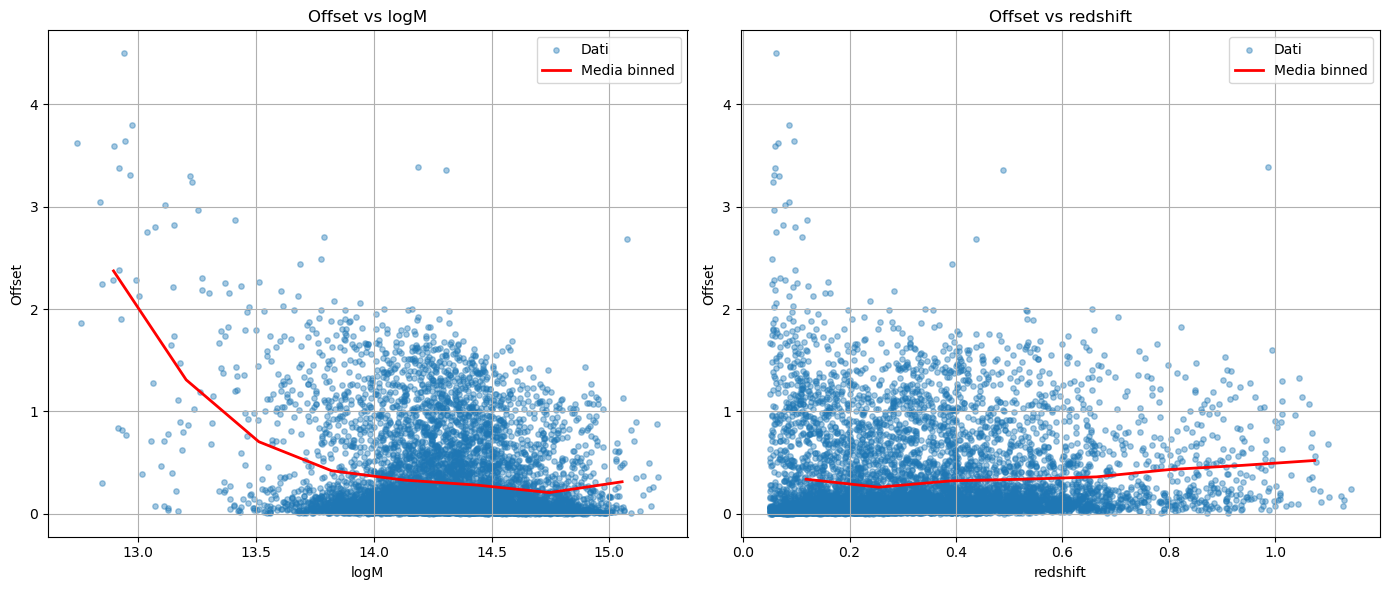

In [4]:
nbins_logM = 8     # numero di bin per logM
nbins_z = 8        # numero di bin per z

def bins_func(x, y, nbins):     #Restituisce centri-bin e media di y nei bin di x.

    bins = np.linspace(x.min(), x.max(), nbins + 1)     # crea una lista di nbin+1 valori
    
    indices = np.digitize(x, bins) - 1  #affibia ad ogni valore all'interno di x un indice in base
                                        # al bin in cui si trova
    y_means = []     #inizializzo delle series
    x_centers = []

    for i in range(nbins):   #itero sui bins
        mask = indices == i  # definisco una mask (true se valore in x appartiene al bin i) 
        
        y_means.append(y[mask].mean())  #calcolo la media e la salvo in y_mean
        x_centers.append(0.5 * (bins[i] + bins[i + 1]))  #calcolo il centro dei bin per il plot

    return np.array(x_centers), np.array(y_means), bins   #risultati


# applico la funzione 
logM_centers, offset_mean_logM, _ = bins_func(logM.values, offset.values, nbins_logM)
z_centers, offset_mean_z, _ = bins_func(z.values, offset.values, nbins_z)

#plot dei grafici
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# offset vs logM
axes[0].scatter(logM, offset, alpha=0.4, s=15, label="Dati") #scatter plot pffset vs logM gia presentato
axes[0].plot(logM_centers, offset_mean_logM, color="red", lw=2, label="Media binned") #plot andamento medio
axes[0].set_xlabel("logM")
axes[0].set_ylabel("Offset")
axes[0].set_title("Offset vs logM")
axes[0].grid(True)
axes[0].legend()

# offset vs z
axes[1].scatter(z, offset, alpha=0.4, s=15, label="Dati")  #scatter plot pffset vs z gia presentato
axes[1].plot(z_centers, offset_mean_z, color="red", lw=2, label="Media binned") #plot andamento medio
axes[1].set_xlabel("redshift")
axes[1].set_ylabel("Offset")
axes[1].set_title("Offset vs redshift")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

## $Andamento$ $dell'offset$ $medio$
<div style="">
<p>

$\text{Per approfondire, vengono presentati gli ultimi due grafici. Essi riportano l'andamento dell'offset medio}$
$\text{in relazione a logM(sinistra) e al redshift(destra).  }$
$\text{Si osserva che l’offset mostra una dipendenza più marcata dalla massa dell’ammasso rispetto}$    
$\text{al redshift. }$
$\text{Questo è in linea con le aspettative, infatti si capisce facilmente come la massa sia un indice }$
$\text{più "forte" della struttura dell'ammasso, rispetto alla distanza, tracciata dal redshift. Inoltre, ricordando }$
$\text{che l'offset è dato dalla differenza tra il centro dell'ammasso misurato in banda X e quello misurato}$
$\text{in banda ottica, capiamo perchè ammassi meno massivi hanno un offset maggiore. Nei sistemi meno massivi}$
$\text{ il potenziale gravitazionale è più debole e l’ammasso è maggiormente influenzato da turbolenze e moti}$
$\text{irregolari delle galassie. Questo produce disallineamenti più marcati tra il centro X–ray e quello ottico}$

$\text{Negli ammassi più massivi, invece, la maggior attrazione gravitazionale tende a far coincidere meglio}$
$\text{le due componenti, riducendo l’offset}$
$\text{}$

</div>

# $Modellizzazione$ $della$ $distribuzione$ $dell'offset$ 

$\text{Prenderemo ora in cosiderazione due modelli che vogliono predirre la distribuzione dell'offset negli ammassi }$
$\text{a partire da tre parametri. La frazione ρ di ammassi ben centrati viene descritta dal parametro σ₀. ed }$
$\text{una frazione 1−ρ di ammassi miscentrati viene descritta dal parametro σ₁}$

## $Modello$ $S15(saro$ $et$ $al.2015)$

$P(x|ρ,σ₀,σ₁)=ρ\frac{x}{σ₀^2}exp(-0.5(\frac{x}{σ₀})^2) +(1-ρ)\frac{x}{σ₁^2}exp(-0.5(\frac{x}{σ₁})^2)$
## $Modello$ $Z19(Zhang$ $et$ $al.2019)$
$P(x|ρ,σ₀,σ₁)=ρ\frac{1}{σ₀}exp(-(\frac{x}{σ₀})) +(1-ρ)\frac{x}{σ₁^2}exp(-(\frac{x}{σ₁}))$

### $Plot$ $dei$ $modelli$ $al$ $variare$ $dei$ $parametri$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
    

$\text{Dopo aver definito il range su cui visualizzare l'andamento, vengono implementati i modelli. Per il range}$
$\text{è stato scelto l'intervallo tra 0 e 1.5, e non fino al max dell'offset misurato, per zummare meglio sul}$
$\text{picco principale e, inoltre, poiché il comportamento per valori > 1.5 è indistinguibile al variare dei parametri.}$
$\text{Poi vengono implementati i modelli definendo due funzioni, s15pdf e s19pdf, successivamente impostiamo}$
$\text{i parametri di riferimento, da tenere fissi mentre variamo gli altri. A seguire vengono definiti tre}$
$\text{valori diversi per ogni parametro dei modelli. Poi viene impostato per ogni parametro un ciclo for con cui }$
$\text{plottiamo i modelli per ogniuno dei tre valori. Il codice usato per i plot è analogo a quello usato per i}$
$\text{plot precedenti }$
</div>

Come parametri di riferimento sono stati scelti: ρ= 0.7 σ₀= 0.05 σ₁= 0.3


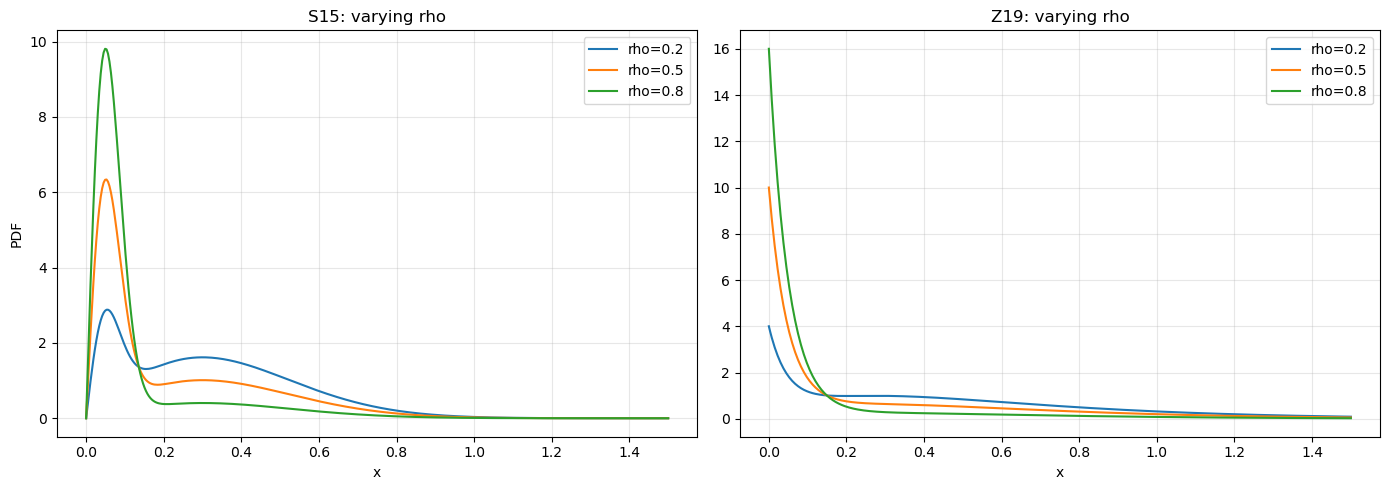

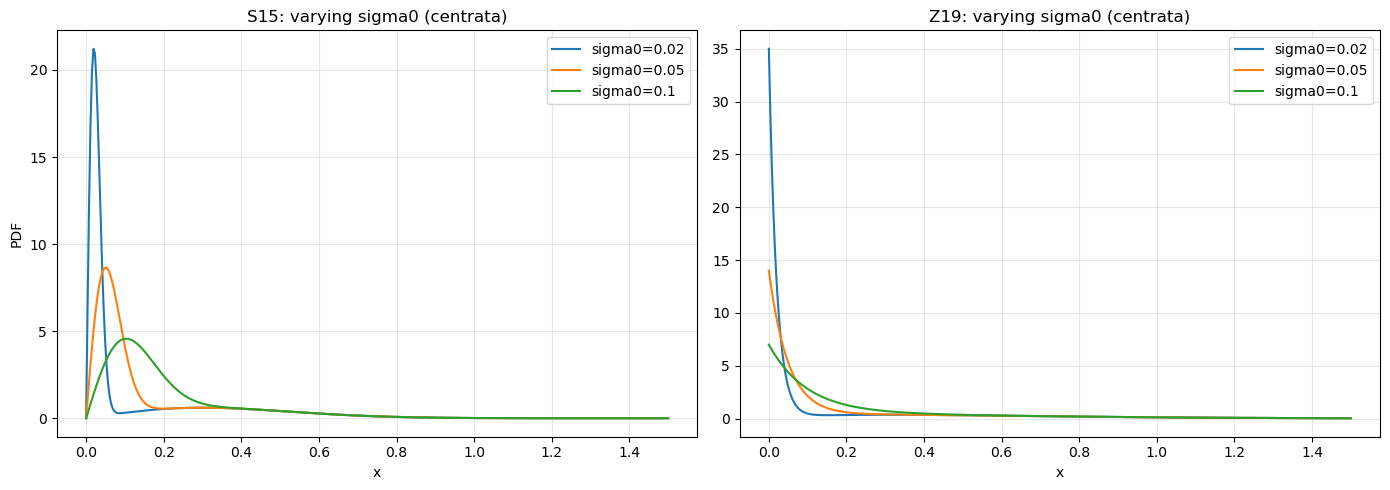

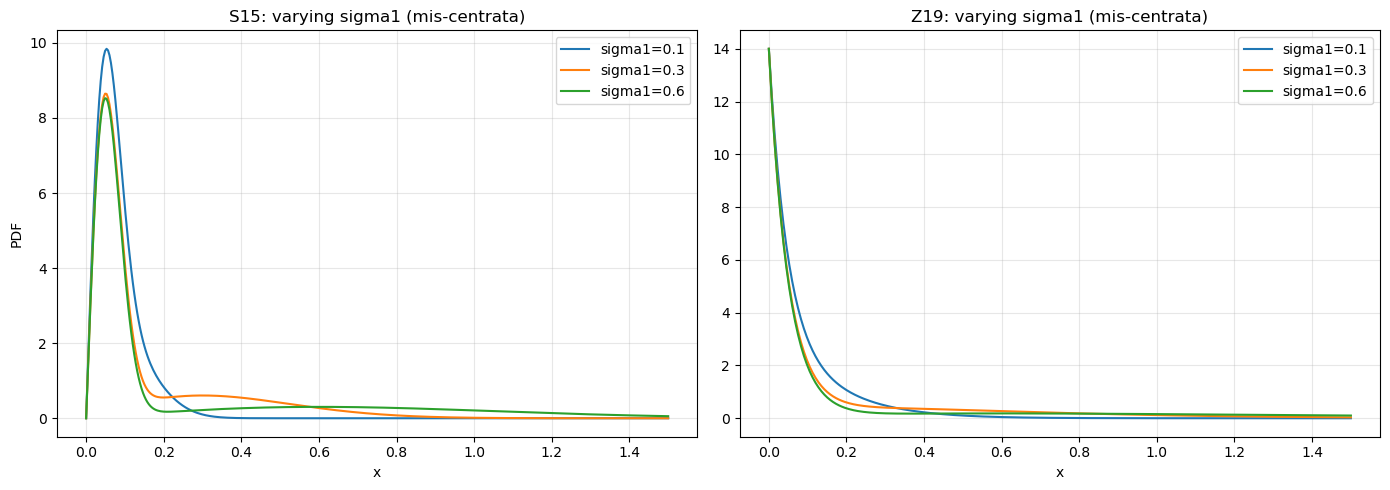

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



file_path = "catalog.csv"
df = pd.read_csv(file_path)

#Selezino le colonne relative ai dati di interesse 
z = df["BEST_Z"]
logM = df["logM500"]
offset = df["BCG_offset_R500"]

# Range sulle x(offset) per i plot dei modelli
x = np.linspace(0, 1.5, 400)

#  definizione funzione per il modello S15
def s15_pdf(x, rho, sigma0, sigma1):
  
    term1 = rho * (x / sigma0**2) * np.exp(-0.5 * (x / sigma0)**2)
    term2 = (1 - rho) * (x / sigma1**2) * np.exp(-0.5 * (x / sigma1)**2)
    return term1 + term2

# definizione funzione per il modello Z19
def z19_pdf(x, rho, sigma, tau):
    
    term1 = rho * (1 / sigma) * np.exp(-x / sigma)
    term2 = (1 - rho) * (x / tau**2) * np.exp(-x / tau)
    return term1 + term2


# parametri di riferimento
rho0 = 0.7
sigma0_s15 = 0.05   # componente centrata per S15
sigma1_s15 = 0.3    # componente mis-centrata per S15
sigma0_z19 = 0.05  # componente centrata Z19
sigma1_z19 = 0.3     # componente mis-centrata Z19


print("Come parametri di riferimento sono stati scelti: ρ=", rho0, "σ₀=",sigma0_s15,"σ₁=",sigma1_s15)


# Variazione di rho
rhos = [0.2, 0.5, 0.8]

plt.figure(figsize=(14,5))

#variazione di rho per S15
plt.subplot(1,2,1)   # plot con le coordinate per la figura
for r in rhos:        #per i diversi valori di rho plotto la curva del modello 
    plt.plot(x, s15_pdf(x, r, sigma0_s15, sigma1_s15), label=f"rho={r}")
plt.title("S15: varying rho")
plt.xlabel("x")
plt.ylabel("PDF")
plt.grid(alpha=0.3)
plt.legend()

#variazione di rho per S19
plt.subplot(1,2,2)
for r in rhos:
    plt.plot(x, z19_pdf(x, r, sigma0_z19, sigma1_z19), label=f"rho={r}")
plt.title("Z19: varying rho")
plt.xlabel("x")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


# Variazione della componente centrata (sigma0_s15 per S15, sigma0_s19 per Z19)

sigma0_values = [0.02, 0.05, 0.1]

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for s0 in sigma0_values:   #per i diversi valori di sigma0 plotto la curva del modello 
    plt.plot(x, s15_pdf(x, rho0, s0, sigma1_s15), label=f"sigma0={s0}")
plt.title("S15: varying sigma0 (centrata)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
for s in sigma0_values:
    plt.plot(x, z19_pdf(x, rho0, s, sigma1_z19), label=f"sigma0={s}")
plt.title("Z19: varying sigma0 (centrata)")
plt.xlabel("x")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Variazione della componente mis-centrata (sigma1 per S15, tau per Z19)
sigma1_values = [0.1, 0.3, 0.6]

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for s1 in sigma1_values:      #per i diversi valori di sigma1 plotto la curva del modello 
    plt.plot(x, s15_pdf(x, rho0, sigma0_s15, s1), label=f"sigma1={s1}")
plt.title("S15: varying sigma1 (mis-centrata)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.grid(alpha=0.3)
plt.legend()

plt.subplot(1,2,2)
for t in sigma1_values:
    plt.plot(x, z19_pdf(x, rho0, sigma0_z19, t), label=f"sigma1={t}")
plt.title("Z19: varying sigma1 (mis-centrata)")
plt.xlabel("x")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## $Modelli$ $al$ $variare$ $dei$ $parametri$

$\text{Nei grafici possiamo osservare qualitativamente come cambia, al variare dei parametri, la distribuzione}$
$\text{dell'offset predetta dai modelli.  }$

$\text{I modelli si comportano come da aspettativa. Osserviamo infatti: }$
### $Variazione$ $di$ $ρ$
$\text{Ricordando che ρ è la frazione di ammassi ben centrati, osserviamo che i modelli si comportano }$
$\text{coerentemente. Infatti per entrambi, la distribuzione predetta dell'offset, è man mano meno centrata sullo }$
$\text{zero. Tuttavia si osserva che mentre per il modello S15 il massimo della distribuzione si sposta su valori }$
$\text{maggiori, per Z19 il massimo rimane sullo 0 ma diminuisce il suo valore in favore di una coda piu larga.}$
$\text{}$
### $Variazione$ $di$ $σ₀$
$\text{Il parametro σ₀ regola la scala di distribuzione per l'offset degli ammassi ben centrati, se aumentiamo}$
$\text{il parametro dovrà aumentare la probabilità di misurare offset maggiori. Questo viene osservato nei grafici }$
$\text{con una simile differenza tra i due modelli nel caso della variazione di ρ.}$

### $Variazione$ $di$ $σ₁$
$\text{I modelli mostrano che, all'aumentare di σ₁, aumenta la probabilità di misurare offset maggiori. Questo }$
$\text{è coerente con il significato fisico del parametro, in quanto σ₁ regola la scala di distribuzione degli }$
$\text{offset per gli ammassi di galassie miscentrati}$
$\text{}$

## $Fit$ $dei$ $modelli$ $usando$ $l'algoritmo$ $emcee$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

    
$\text{In questa sezione viene eseguito il fit dei parametri dei modelli S15 e Z19 che descrivono la }$
$\text{distribuzione degli offset osservati negli ammassi.}$

$\text{Per farlo utilizziamo un algoritmo MCMC (Markov Chain Monte Carlo), in particolare l’implementazione}$
$\text{EnsembleSampler fornita dalla libreria emcee.}$
$\text{Questo metodo permette di ottenere campioni dalla distribuzione a posteriori dei parametri, tenendo conto}$
$\text{sia della verosimiglianza dei dati che dei vincoli sui parametri (prior).}$
$\text{}$
</div>

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

<strong>Definizione del prior</strong><br>
$\text{Viene definito un prior uniforme sui valori possibili, per i valori fisicamente insensati la funzione}$
$\text{lnprior restituisce -np.inf() cioè la probabilità di avere parametri fuori dal range sensato è uguale }$
$\text{a zero. Per il parametro rho il range possibile è per definizione tra 0 e 1. Per i valori di sigma il prior }$
$\text{è stato scelto uniforme sui valori positivi. Riassumendo la funzione logprior restituisce 0 se le condizioni }$
$\text{( 0<ρ<1,  0<σ₀,  0<σ₁ ) sono tutte e tre verificate}$
<br><br>
<strong>Definizione della likelihood</strong><br>
$\text{La funzione lnlike calcola la log-likelihood dei dati, dati i parametri del modello. Si ottiene valutando }$
$\text{la pdf del modello per ciascun dato osservato e sommando il logaritmo delle probabilità. Se la  pdf ha}$
$\text{anche solo un valore negativo essa non è sensata e la funzione lnlike restituisce -np.inf(). Nel caso}$
$\text{in cui la pdf sia positiva su tutti i dati allora lnlike restituisce la somma dei logaritmi delle probabilità}$
$\text{con : np.sum(np.log(pdf))}$
$\text{}$

<strong>Definizione della posterior</strong><br>
$\text{Se la lnprior è finita, cioé i parametri sono sensati, la funzione lnprob restituisce la somma della}$
$\text{lnlike e lnprior, altrimenti, in caso contrario viene restituito -np.inf().}$

In [6]:
import emcee

# imposto il prior likelyhood e posterior per entrambi i modelli

# S15 

#alternativa? 
#def lnprior_s15(theta):
#    rho, log_sigma0, log_sigma1 = theta
#    if not (0 < rho < 1):
#        return -np.inf
#    sigma0 = np.exp(log_sigma0)
#    sigma1 = np.exp(log_sigma1)
#    if not ( 0<sigma0<0.2 and 0<sigma1<1 ):
#        return -np.inf
#    return 0.0

#prior debole?
def lnprior_s15(theta):
    rho, log_sigma0, log_sigma1 = theta
    sigma0 = np.exp(log_sigma0)
    sigma1 = np.exp(log_sigma1)
    if not ( 0 < rho < 1 and 0<sigma0 and 0<sigma1 ):
        return -np.inf
    return 0.0
    
def lnlike_s15(theta, data):
    rho, log_sigma0, log_sigma1 = theta
    sigma0 = np.exp(log_sigma0)
    sigma1 = np.exp(log_sigma1)
    pdf = s15_pdf(data, rho, sigma0, sigma1)
    if np.any(pdf <= 0):
        return -np.inf
    return np.sum(np.log(pdf))

def lnprob_s15(theta, data):
    lp = lnprior_s15(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike_s15(theta, data)

# Z19 
def lnprior_z19(theta):
    rho, sigma, tau = theta
    if not (0 < rho < 1 and sigma > 0 and tau > 0):
        return -np.inf
    return 0.0

def lnlike_z19(theta, data):
    rho, sigma, tau = theta
    pdf = z19_pdf(data, rho, sigma, tau)
    if np.any(pdf <= 0):
        return -np.inf
    return np.sum(np.log(pdf))

def lnprob_z19(theta, data):
    lp = lnprior_z19(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike_z19(theta, data)

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
<strong>Implementazione MCMC con emcee</strong><br>
$\text{Definisco una funzione:}$ run_mcmc(lnprob_func, initial_guess, ndim, nwalkers, data, nsteps=5000, discard=2500)$\text{che implementa l'algoritmo emcee e restituisce i campioni}$
$\text{Essa prende come argomenti: la posterior del mio modello, una stima iniziale di partenza(initial guess), }$
$\text{ il numero dei miei parametri(ndim), Il numero di walkers, i dati su cui voglio fittare i modelli, il }$
$\text{numero di step totali per ogni walker e viene specificato anche il numero di campionamenti da eliminare }$
$\text{come burn in(discard = 2000).}$
    $\text{In essa viene creato un array di punti iniziali attorno alla stima iniziale dei parametri, (initialguess), }$
$\text{uno per ciascun walker. Il piccolo rumore casuale serve a distribuire i walker leggermente diversi tra loro, }$
$\text{così da esplorare meglio lo spazio dei parametri.}$

$\text{Si crea un oggetto EnsembleSampler che implementa l’algoritmo MCMC. Qui si specificano:}$

$\text{-nwalkers: numero di catene parallele,}$

$\text{-ndim: numero di parametri del modello,}$

$\text{-lnprobfunc: funzione che calcola il log-posterior,}$

$\text{-args=(data): dati osservati da passare alla funzione.}$

$\text{Con il comando :}$
sampler.run_mcmc(p0, nsteps, progress=True)
$\text{I walker iniziano a muoversi nello spazio dei parametri per nsteps passi. L’opzione progress=True mostra }$
$\text{una barra di avanzamento.}$

$\text{Con:}$ samples = sampler.get_chain(discard=discard, flat=True).
$\text{dopo la fase iniziale di burnin, si estraggono tutti i campioni rimasti e li si appiattisce in un array 2D}$

In [7]:
#fit dei dati
def run_mcmc(lnprob_func, initial_guess, ndim, nwalkers, data, nsteps=5000, discard=2500):
    p0 = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_func, args=[data])
    sampler.run_mcmc(p0, nsteps, progress=True)
    samples = sampler.get_chain(discard=discard, flat=True)
    return samples

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

<strong>Campionamento dei parametri</strong><br>
$\text{Il fit viene poi inizializzato prima definendo un punto di partenza(initial guess) e poi applicando la funzione }$
 $\text{runmcmc alla posterior dei modelli per entrambi i modelli vengono ottniamo quindi i samples contenuti }$
$\text{in un array numpy 100 000x3. Per ottenere i parametri da questa distribuzione campionata usiamo la  }$
$\text{funzione np.median() applicandola alla colonna desiderata.}$
$\text{}$
$\text{}$
$\text{}$

</p>
</div>

In [8]:
# dati 
data = offset.values  


# Fit S15

print("Fit S15...")
ndim_s15 = 3
nwalkers = 40

# guess iniziali log-sigma
initial_guess_s15 = np.array([0.5, np.log(0.02), np.log(0.15)])
samples_s15 = run_mcmc(lnprob_s15, initial_guess_s15, ndim_s15, nwalkers, data)

rho_s15 = np.mean(samples_s15[:,0])
sigma0_s15 = np.exp(np.mean(samples_s15[:,1]))
sigma1_s15 = np.exp(np.mean(samples_s15[:,2]))

print("Parametri S15:")
print("rho =", rho_s15)
print("sigma0 =", sigma0_s15)
print("sigma1 =", sigma1_s15)


# Fit Z19


print("\nFit Z19...")
ndim_z19 = 3
initial_guess_z19 = np.array([0.5, 0.05, 0.2])
samples_z19 = run_mcmc(lnprob_z19, initial_guess_z19, ndim_z19, nwalkers, data)

rho_z19 = np.median(samples_z19[:,0])
sigma_z19 = np.median(samples_z19[:,1])
tau_z19 = np.median(samples_z19[:,2])

print("Parametri Z19:")
print("rho =", rho_z19)
print("sigma =", sigma_z19)
print("tau =", tau_z19)

Fit S15...


100%|██████████| 5000/5000 [00:56<00:00, 87.88it/s] 


Parametri S15:
rho = 0.628120386985811
sigma0 = 0.06700114511852176
sigma1 = 0.6230258570152786

Fit Z19...


100%|██████████| 5000/5000 [00:51<00:00, 98.04it/s] 

Parametri Z19:
rho = 0.6805137085660585
sigma = 0.09867115320318745
tau = 0.3915387265822573


<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

<strong>Plot del fit dei modelli</strong><br>

$\text{Una volta ottenuti i parametri medi, possiamo sostituirli nei modelli che valutiamo sul'intervallo di}$
$\text{visualizzazione. Non ci resta quindi che plottare le curve ottenute e sovrapporle all'istogramma dell'offset}$
$\text{per avere un confronto qualitativo. Oltre i due grafici che mostrano confronto tra dati e modello fittato, }$
$\text{infine, vengono plottati entrambi nella stessa figura. Per quest'ultimo plot si è voluto zummare sull'asse }$
$\text{dell'offset per valori tra 0 e 2, si è quindi definito un secondo intervallo ristretto per il plot, e, }$
$\text{l'istogramma è stato plottato solo per valori di offset <2 utilizzando una mask.}$


</p>
</div>

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

<strong>Plot del fit dei modelli</strong><br>

$\text{Una volta ottenuti i parametri medi, possiamo sostituirli nei modelli che valutiamo sul'intervallo di}$
$\text{visualizzazione. Non ci resta quindi che plottare le curve ottenute e sovrapporle all'istogramma dell'offset}$
$\text{per avere un confronto qualitativo. Oltre i due grafici che mostrano confronto tra dati e modello fittato, }$
$\text{infine, vengono plottati entrambi nella stessa figura. Per quest'ultimo plot si è voluto zummare sull'asse }$
$\text{dell'offset per valori tra 0 e 2, si è quindi definito un secondo intervallo ristretto per il plot, e, }$
$\text{l'istogramma è stato plottato solo per valori di offset <2 utilizzando una mask.}$


</p>
</div>

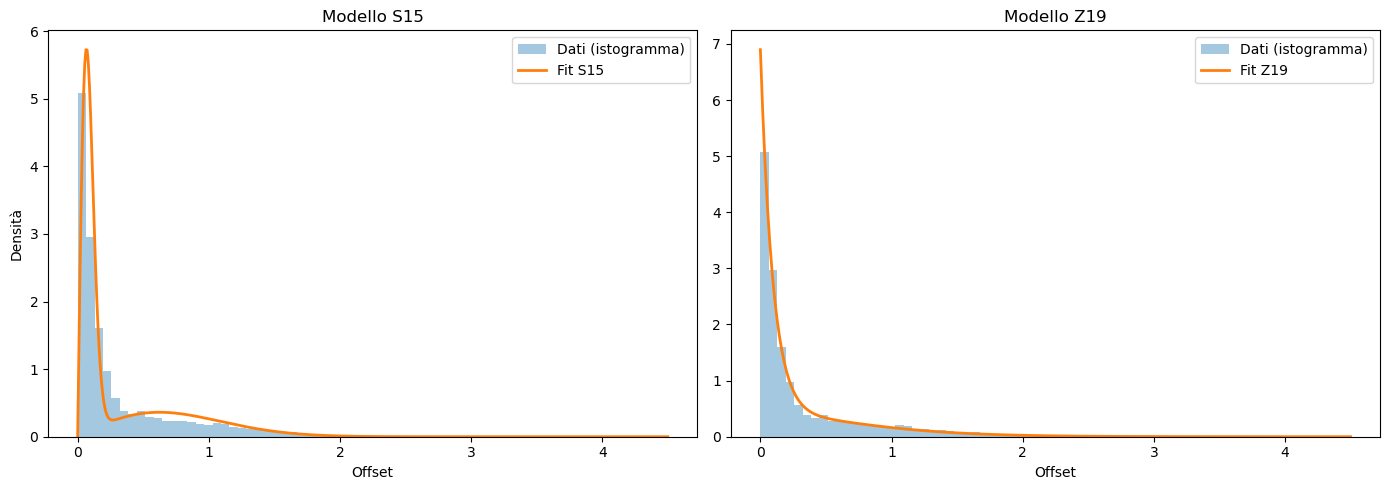

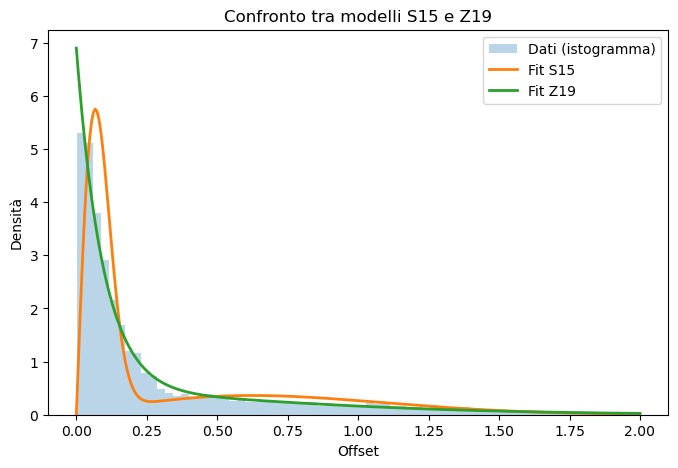

In [9]:
x_plot = np.linspace(0, max(data), 500) #intervallo di visualizzazione

#valori dei modelli su intervallo
s15_fit = s15_pdf(x_plot, rho_s15, sigma0_s15, sigma1_s15) 
z19_fit = z19_pdf(x_plot, rho_z19, sigma_z19, tau_z19)

# Grafici
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# S15
axes[0].hist(data, bins=70, density=True, alpha=0.4, label="Dati (istogramma)")
axes[0].plot(x_plot, s15_fit, label="Fit S15", linewidth=2)
axes[0].set_title("Modello S15")
axes[0].set_xlabel("Offset")
axes[0].set_ylabel("Densità")
axes[0].legend()

# Z19
axes[1].hist(data, bins=70, density=True, alpha=0.4, label="Dati (istogramma)")
axes[1].plot(x_plot, z19_fit, label="Fit Z19", linewidth=2)
axes[1].set_title("Modello Z19")
axes[1].set_xlabel("Offset")
axes[1].legend()

plt.tight_layout()
plt.show()


# Grafico di confronto

mask = data<2
data2 = data[mask]
x_plot2 = np.linspace(0,2,300)
s15_fit2 = s15_pdf(x_plot2, rho_s15, sigma0_s15, sigma1_s15)
z19_fit2 = z19_pdf(x_plot2, rho_z19, sigma_z19, tau_z19)

plt.figure(figsize=(8,5))
plt.hist(data2, bins=70, density=True, alpha=0.3, label="Dati (istogramma)")
plt.plot(x_plot2, s15_fit2, label="Fit S15", linewidth=2)
plt.plot(x_plot2, z19_fit2, label="Fit Z19", linewidth=2)
plt.xlabel("Offset")
plt.ylabel("Densità")
plt.title("Confronto tra modelli S15 e Z19")
plt.legend()
plt.show()

## $Confronto$ $qualitativo$ $tra$ $modelli$
$\text{Utilizzando il metodo MCMC vengono fittati i modelli S15 e Z19 alle misure dell'offset effettuate da eROSITA.  }$
$\text{I risultati sono:}$

$\text{Parametri S15: ρ = 0.628 σ₀ = 0.067 σ₁ = 0.623}$

$\text{Parametri Z19: ρ = 0.681 σ₀ = 0.099 σ₁ = 0.392}$


$\text{Nei grafici è mostrata la distribuzione osservata dell’offset e, sovrapposti, i modelli derivanti dal fit.
}$
$\text{Si osserva qualitativamente che il modello Z19 riproduce meglio la distribuzione dei dati, mentre il}$
$\text{modello S15 presenta discrepanze più evidenti rispetto alla distribuzione osservata.}$


## $Propagazione$ $dell'incertezza$ $teorica$ $dei$ $modelli$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>

<strong>Spiegazione teorica</strong><br>

$\text{Quando effettuo un fit tramite MCMC quello che ottengo non è solo un valore medio per i parametri, ma }$
$\text{una distribuzione dei parametri. Da tale distribuzione deriva quindi una distribuzione dei modelli.}$

$\text{Per ottenere le bande di incertezza calcolo quindi i percentili di quest'ultima. In questo caso, per la }$ 
$\text{costruzione della banda, vengono utilizzati}$ 16% e 84%

<strong>Costruzione del codice</strong><br>
$\text{Viene scelto il numero di campioni di parametri ottenuti con l'MCMC da estrarre casualmente e utilizzare  }$ 
$\text{per il calcolo dei percentili, più campioni-->bande più precise.  }$
$\text{Con un ciclo for, per ogni campione estratto, viene calcolata la pdf del modello sull'intervallo di }$
$\text{visualizzazione. Ogni serie di valori, relativa ad una pdf con diversi parametri, viene poi salvata in un  }$
$\text{array, che quindi avra shape = nsamples x len(xplot). Da questo array vengono finalmente calcolati i }$
$\text{percentili utilizzando:}$ np.percentile(pdfs, %, axis=0) 

$\text{Per effettuare il plot delle bande viene usato:}$ plt.fill_between()
$\text{Nel quale specifico l'intervallo sulle x, il limite inferiore della banda, il limite superiore, colore }$
$\text{e trasparenza del plot}$
$\text{}$
$\text{}$

</p>
</div>


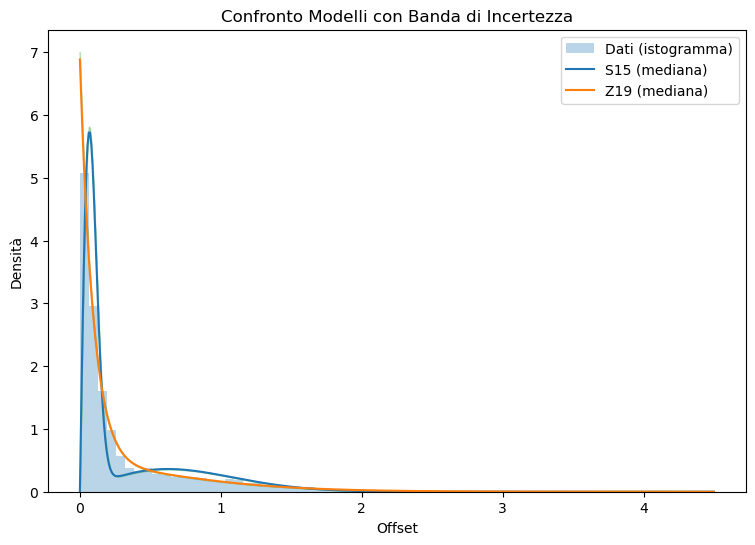

In [10]:
# Propago l'incertezza sui parmetri
# Numero di campioni MCMC da usare per le bande
nsamples_band = 300

# Indici casuali dei campioni
idx_s15 = np.random.choice(len(samples_s15), nsamples_band, replace=False)
idx_z19 = np.random.choice(len(samples_z19), nsamples_band, replace=False)

# Matrici per salvare le pdf campionate
pdfs_s15 = []
pdfs_z19 = []

# S15 
for i in idx_s15:
    rho, log_s0, log_s1 = samples_s15[i]
    sigma0 = np.exp(log_s0)
    sigma1 = np.exp(log_s1)
    pdfs_s15.append(s15_pdf(x_plot, rho, sigma0, sigma1))

pdfs_s15 = np.array(pdfs_s15)

# Banda di incertezza
s15_median = np.percentile(pdfs_s15, 50, axis=0)
s15_low    = np.percentile(pdfs_s15, 16, axis=0)
s15_high   = np.percentile(pdfs_s15, 84, axis=0)

# Z19 
for i in idx_z19:
    rho, sigma, tau = samples_z19[i]
    pdfs_z19.append(z19_pdf(x_plot, rho, sigma, tau))

pdfs_z19 = np.array(pdfs_z19)

# Calcolo dei percentili per i limiti della banda
z19_median = np.percentile(pdfs_z19, 50, axis=0)
z19_low    = np.percentile(pdfs_z19, 16, axis=0)
z19_high   = np.percentile(pdfs_z19, 84, axis=0)


# grafico con le bande
plt.figure(figsize=(9,6))

# istogramma dei dati
plt.hist(data, bins=70, density=True, alpha=0.3, label="Dati (istogramma)")

# banda S15
plt.fill_between(x_plot, s15_low, s15_high, color="C2", alpha=0.3)
plt.plot(x_plot, s15_median, color="C0", label="S15 (mediana)")

# banda Z19
plt.fill_between(x_plot, z19_low, z19_high, color="C2", alpha=0.3)
plt.plot(x_plot, z19_median, color="C1", label="Z19 (mediana)")

plt.xlabel("Offset")
plt.ylabel("Densità")
plt.title("Confronto Modelli con Banda di Incertezza")
plt.legend()
plt.show()

## $Propagazione$ $dell'incertezza$ $teorica$ $dei$ $modelli$
$\text{Nel grafico, anche se molto difficile vederle, sono presenti le bande di incertezza teorica dei modelli, }$
$\text{comprese tra i percentili 16 e 84.}$

$\text{Le bande, per entrambi i modelli, sono appunto così strette da risultare quasi invisibili, questo significa}$
$\text{che la distribuzione dei parametri è molto stretta, o in altre parole, si ha poca incertezza sui parametri. }$
$\text{Possiamo quindi affermare che il fit è buono e che i dati permettono una buona vincolazione dei parametri.}$

$\text{Tuttavia la bontà del fit non basta per determinare la bontà dei modelli. Infatti la bassa incertezza }$
$\text{sui parametri potrebbe anche essere dovuta ad una rigidità eccessiva del modello. Nel prossimo paragrafo}$
$\text{procederemo con un Test del CHIquadro per confrontare numericamentei modelli.}$

## $Codice$ $per$ $il$ $test$ $CHIquadro$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
    
$\text{Nella sezione di codice seguente è stato implementato il test chiquadro per avere un confronto numerico }$
$\text{tra i due modelli. Viene scelto il numero di bins e calcolato il centro dei bins, la larghezza e i conteggi }$
$\text{totali. Una volta calcolate le frequenze attese in ogni bin per entrambi i modelli, elimino eventuali }$
$\text{valori nulli e seleziono i bin validi(con count>=5). Calcolo quindi il chiquadro usando np.sum e trovo }$
$\text{i gradi di libertà per il calcolo del ridotto. Infine confronto i risultati e ottengo il verdetto}$

In [11]:
# Istogramma dei dati
nbins = 30
counts, bin_edges = np.histogram(data, bins=nbins, density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = np.diff(bin_edges)
N = len(data)

# Frequenze attese
expected_s15 = s15_pdf(bin_centers, rho_s15, sigma0_s15, sigma1_s15) * bin_widths * N
expected_z19 = z19_pdf(bin_centers, rho_z19, sigma_z19, tau_z19) * bin_widths * N

# Evito valori nulli
expected_s15[expected_s15 <= 0] = 1e-12
expected_z19[expected_z19 <= 0] = 1e-12

#evito bin con conteggi troppo piccoli
valid_bins = counts>=5
counts= counts[valid_bins]
expected_s15=expected_s15[valid_bins]
expected_z19=expected_z19[valid_bins]

# calcolo il CHiquadrato
chi2_s15 = np.sum((counts - expected_s15)**2 / expected_s15)
chi2_z19 = np.sum((counts - expected_z19)**2 / expected_z19)

# gradi di libertà per il chi ridotto con 3 parametri
dof_s15 = nbins - 3 - 1   
dof_z19 = nbins - 3 - 1   

# ridotto
chi2red_s15 = chi2_s15 / dof_s15
chi2red_z19 = chi2_z19 / dof_z19

print("Chi S15 =", chi2_s15)
print("Chi ridotto S15 =", chi2red_s15)

print("Chi Z19 =", chi2_z19)
print("Chi ridotto Z19 =", chi2red_z19)

# Confronto
print("Conclusione:")

if chi2red_s15 < chi2red_z19:
    print("Il modello S15 descrive meglio i dati (χ² più basso).")
else:
    print("Il modello Z19 descrive meglio i dati (χ² più basso).")


Chi S15 = 18549.39340880292
Chi ridotto S15 = 713.4382080308816
Chi Z19 = 142.39205293720372
Chi ridotto Z19 = 5.476617420661682
Conclusione:
Il modello Z19 descrive meglio i dati (χ² più basso).


# $Conclusioni$
### $Distribuzione$ $dell'offset$
$\text{Studiando il comportamento medio dell’offset in funzione della massa e del redshift , troviamo che esso}$
$\text{cresce nei sistemi a bassa massa, indicando un maggiore grado di irregolarità.}$

$\text{La dipendenza dal redshift risulta invece debole,suggerendo che l’epoca osservativa non influisce  }$
$\text{significativamente sul disallineamento tra componenti collisive e collisionless. I risultati confermano }$
$\text{che la massa rappresenta il principale fattore che determina il livello di miscentering negli ammassi }$
$\text{di galassie.}$

### $Modellizzazione$
$\text{Dallo studio dei modelli S15(Saro et al2015) e Z19(Zhang et al.2019) abbiamo ottenuto, utilizzando il metodo MCMC per ottenere una stima dei parametri: }$

$\text{Parametri S15: ρ = 0.628 σ₀ = 0.067 σ₁ = 0.623}$

$\text{Parametri Z19: ρ = 0.681 σ₀ = 0.099 σ₁ = 0.392}$

$\text{I due modelli mostrano una frazione simile di ammassi ben centrati, con ρ leggermente più basso in S15 }$
$\text{rispetto a Z19. La differenza principale riguarda le scale degli offset: in linea con le aspettative,  }$
$\text{gli ammassi ben centrati hanno miscentering molto contenuto mentre quelli mis-centrati presentano valori}$
$\text{maggiori, indicando offset più estesi}$
$\text{}$
$\text{}$
$\text{}$
$\text{}$


$\text{Dalla propagazione dell'incertezza teorica si osserva che le bande di incertezza risultano molto strette,}$
$\text{da questo possiamo dire che il fit è "buono", la stima dei parametri è molto precisa e i dati contengono } $
$\text{informazione sufficiente per vincolare bene i parametri. Tuttavia, la precisione da sola non garantisce }$
$\text{la bontà del modello. Svolgendo infatti il test del chiquadro per un confronto numerico tra i due modelli}$
$\text{osserviamo come il modello Z19 rappresenta in modo migliore, rispetto a S15, la distribuzione degli offset }$
$\text{misurati da eROSITA.}$